In [1]:
from dolfin import *
from mshr import *
from pylab import show,triplot
import matplotlib.pyplot as plt
import numpy as np
import fenics as fn


RuntimeError: Could not find DOLFIN pkg-config file. Please make sure appropriate paths are set.

In [ ]:
box_width = 200
box_height = 50.

pts_bbox=[]

bounding_box=Polygon([Point(-box_width/2.,0.),
                     Point(box_width/2.,0.),
                     Point(box_width/2.,box_height),
                     Point(-box_width/2.,box_height)])
pillar_height=10
pillar_width=2

hollow_pillar_wall_thickness=0.1

points=[[-pillar_width/2.,0.],
                    [pillar_width/2.,0.],
                     [pillar_width/2.,pillar_height],
                     [-pillar_width/2.,pillar_height]]
points.append(points[0]) #close the loop


pillar_domain=[]
for p in points:
    pillar_domain.append(Point(p[0],p[1]))
pillar_domain0=Polygon(pillar_domain)



hollow_points=[[-pillar_width/2.,0.],
                    [-pillar_width/2.,pillar_height],
                    [-pillar_width/2.+hollow_pillar_wall_thickness,pillar_height],
                    [-pillar_width/2.+hollow_pillar_wall_thickness,0]]
hollow_points.append(hollow_points[0])
hollow_points=np.asarray(hollow_points)[::-1,:]

hollow_pillar_domain=[]
for p in hollow_points:
    hollow_pillar_domain.append(Point(p[0],p[1]))
hollow_pillar_domain0=Polygon(hollow_pillar_domain)


hollow_pillar_domain=[]
for p in hollow_points:
    hollow_pillar_domain.append(Point(p[0]+pillar_width-hollow_pillar_wall_thickness,p[1]))
hollow_pillar_domain1=Polygon(hollow_pillar_domain)


In [2]:
domain=bounding_box-pillar_domain0
#domain_hollow=
mesh = generate_mesh(domain,500)

hollow_domain=bounding_box-hollow_pillar_domain0-hollow_pillar_domain1
hollow_mesh = generate_mesh(hollow_domain,500)


NameError: name 'bounding_box' is not defined

In [3]:


def top_side(x, on_boundary):
    if fn.near(x[1], box_height) and on_boundary:
        return True
def left_side(x, on_boundary):
    if fn.near(x[0], -box_width/2.) and on_boundary:
        return True
def right_side(x, on_boundary):
    if fn.near(x[0], box_width/2.) and on_boundary:
        return True


def bottom_side(x, on_boundary):
    if fn.near(x[1], 0, eps=pillar_height) and on_boundary and x[0]<pillar_width/2. and x[0]>-pillar_width/2.: 
        return True
V = fn.FunctionSpace(mesh, 'P', 1)

v_0 = fn.Constant(1.0)
v_1 = fn.Constant(0.0)

u = fn.TrialFunction(V)
v = fn.TestFunction(V)
f = fn.Constant(0)
a = fn.dot(fn.grad(u), fn.grad(v))*fn.dx
L = f*v*fn.dx

u = fn.Function(V)
top_bc = fn.DirichletBC(V, v_1, top_side)
l_bc = fn.DirichletBC(V, v_1, left_side)
r_bc = fn.DirichletBC(V, v_1, right_side)
bot_bc = fn.DirichletBC(V, v_0, bottom_side)
bcs = [top_bc, bot_bc, l_bc,r_bc]
fn.solve(a == L, u, bcs)

plot(u)


NameError: name 'fn' is not defined

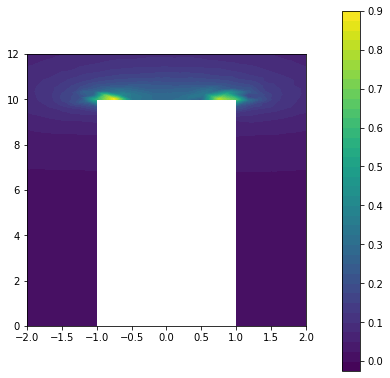

In [35]:
E = - fn.grad(u)
field = fn.File('electric_field.pvd')
field << fn.project(E)
fig=plt.figure(figsize=(5,5))
im=plot(sqrt(E[0]**2+E[1]**2))
plt.xlim(-2,2)
plt.ylim(0,12)
cax = fig.add_axes([1, 0., 0.05, 1])
fig.colorbar(im, cax=cax, orientation='vertical')

(0, 11)

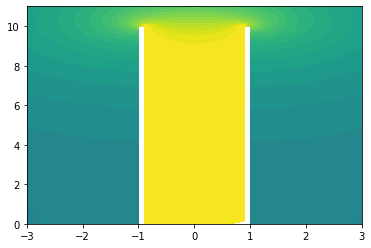

In [24]:


def top_side(x, on_boundary):
    if fn.near(x[1], box_height) and on_boundary:
        return True
def left_side(x, on_boundary):
    if fn.near(x[0], -box_width/2.) and on_boundary:
        return True
def right_side(x, on_boundary):
    if fn.near(x[0], box_width/2.) and on_boundary:
        return True


    
def bottom_side(x, on_boundary):
    if fn.near(x[1], 0, eps=pillar_height) and on_boundary and x[0]<pillar_width/2. and x[0]>-pillar_width/2.: 
        return True
V = fn.FunctionSpace(hollow_mesh, 'P', 1)

v_0 = fn.Constant(1.0)
v_1 = fn.Constant(0.0)

u = fn.TrialFunction(V)
v = fn.TestFunction(V)
f = fn.Constant(0)
a = fn.dot(fn.grad(u), fn.grad(v))*fn.dx
L = f*v*fn.dx

hollow_u = fn.Function(V)
top_bc = fn.DirichletBC(V, v_1, top_side)
l_bc = fn.DirichletBC(V, v_1, left_side)
r_bc = fn.DirichletBC(V, v_1, right_side)
bot_bc = fn.DirichletBC(V, v_0, bottom_side)
bcs = [top_bc, bot_bc, l_bc,r_bc]
fn.solve(a == L, hollow_u, bcs)

plot(hollow_u)
plt.xlim(-3,3)
plt.ylim(0,11)

In [40]:
E_hollow = - fn.grad(hollow_u)
field = fn.File('electric_field_hollow.pvd')
field << fn.project(E_hollow)


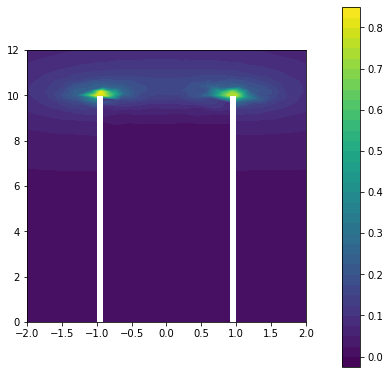

In [42]:
fig=plt.figure(figsize=(5,5))
im=plot(sqrt(E_hollow[0]**2+E_hollow[1]**2))
plt.xlim(-2,2)
plt.ylim(0,12)

cax = fig.add_axes([1, 0., 0.05, 1])
fig.colorbar(im, cax=cax, orientation='vertical')